In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "/Users/sapuantalaspay/vs_projects/introML/final_ML/data/raw/QA_raw.csv"  

df = pd.read_csv(DATA_PATH)
df.head(3)

,Question,Answer
0,How to play basketball if you don't have physi...,"So ,you have to ask for permission and try to ..."
1,How to spend your time with other faculty memb...,You should plan the time before you arrive to ...
2,WHEN SDUDENT SHOULD EAT LUNCH,When you really want to eat


In [2]:
df.columns

Index(['Question', 'Answer'], dtype='object')

In [3]:
Q_COL = "question" if "question" in df.columns else df.columns[0]
A_COL = "answer" if "answer" in df.columns else df.columns[1]

df = df[[Q_COL, A_COL]].rename(columns={Q_COL:"question", A_COL:"answer"})
df.head(3)

,question,answer
0,How to play basketball if you don't have physi...,"So ,you have to ask for permission and try to ..."
1,How to spend your time with other faculty memb...,You should plan the time before you arrive to ...
2,WHEN SDUDENT SHOULD EAT LUNCH,When you really want to eat


In [4]:
def norm_text(x: str) -> str:
    x = "" if pd.isna(x) else str(x)
    x = x.strip()
    x = re.sub(r"\s+", " ", x)
    return x

df["question_raw"] = df["question"]
df["answer_raw"]   = df["answer"]

df["question"] = df["question"].apply(norm_text)
df["answer"]   = df["answer"].apply(norm_text)

df["is_empty_q"] = df["question"].eq("")
df["is_empty_a"] = df["answer"].eq("")

df["q_words"] = df["question"].apply(lambda s: len(s.split()))
df["a_words"] = df["answer"].apply(lambda s: len(s.split()))

df.head(3)

,question,answer,question_raw,answer_raw,is_empty_q,is_empty_a,q_words,a_words
0,How to play basketball if you don't have physi...,"So ,you have to ask for permission and try to ...",How to play basketball if you don't have physi...,"So ,you have to ask for permission and try to ...",False,False,10,17
1,How to spend your time with other faculty memb...,You should plan the time before you arrive to ...,How to spend your time with other faculty memb...,You should plan the time before you arrive to ...,False,False,9,24
2,WHEN SDUDENT SHOULD EAT LUNCH,When you really want to eat,WHEN SDUDENT SHOULD EAT LUNCH,When you really want to eat,False,False,5,6


In [5]:
total = len(df)
empty_q = df["is_empty_q"].sum()
empty_a = df["is_empty_a"].sum()
both_empty = (df["is_empty_q"] & df["is_empty_a"]).sum()

dup_q = df["question"].duplicated().sum()
dup_a = df["answer"].duplicated().sum()
dup_pair = df[["question","answer"]].duplicated().sum()

stats = pd.DataFrame([{
    "rows_total": total,
    "empty_question": int(empty_q),
    "empty_answer": int(empty_a),
    "both_empty": int(both_empty),
    "dup_question": int(dup_q),
    "dup_answer": int(dup_a),
    "dup_pair(q,a)": int(dup_pair),
}])
stats

,rows_total,empty_question,empty_answer,both_empty,dup_question,dup_answer,"dup_pair(q,a)"
0,6173,0,0,0,353,99,77


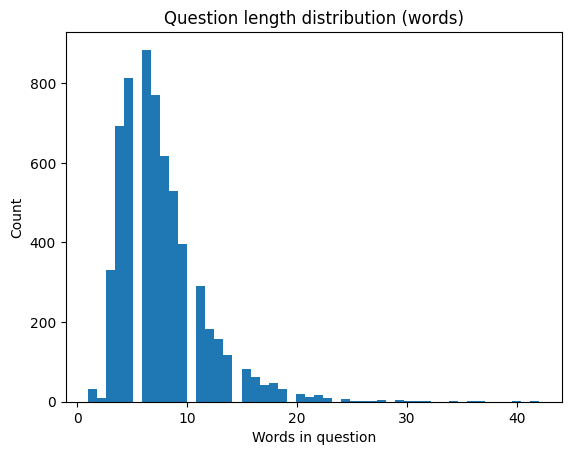

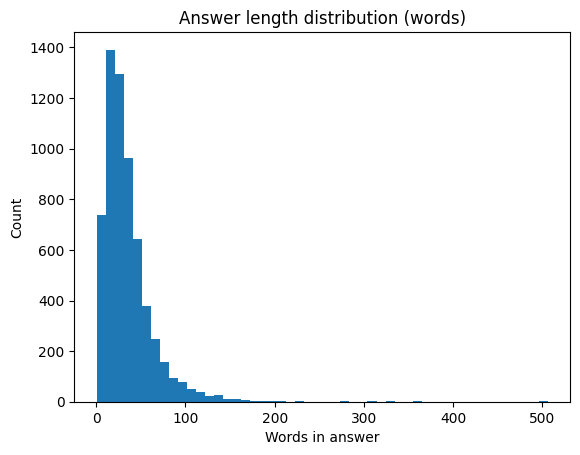

In [6]:
plt.figure()
plt.hist(df["q_words"], bins=50)
plt.title("Question length distribution (words)")
plt.xlabel("Words in question"); plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(df["a_words"], bins=50)
plt.title("Answer length distribution (words)")
plt.xlabel("Words in answer"); plt.ylabel("Count")
plt.show()

In [7]:
df.sort_values("q_words", ascending=False)[["question","q_words","answer","a_words"]].head(10)

,question,q_words,answer,a_words
4457,"Что делать, если есть один предмет из-за котор...",42,Универ предоставляет функции Withdrawal в порт...,91
3709,Мне не хватило квот по предмету MDE 190 я мони...,40,Проблемы не возникнут. Но студенту следует зап...,18
4460,Если я закончил первую часть учебы предметов(K...,37,Нет. Вы должны закончить тот предмет которую в...,26
5434,"Что делать если я студент из БИЛ (КТЛ), и мой ...",37,Вы можете попросить учителя профильного предме...,19
3585,Когда вы поступаете в универ увас будет стипен...,36,Первым делом идёте в student service и они вас...,57
3281,Если я сдал тест IELTS на 7.0 и выше во время ...,34,При поступлении на бакалавриат университета SD...,40
3710,Мне по математике не правильно поставили оценк...,34,баллы за апеляцию будут поставленны после оцен...,9
3807,"Я хочу поступить на магистратуру, но у меня дв...",32,"К сожалению, процесс изменения темы требует вр...",29
1461,Кітапханада кейбір студенттер заттарын тастап ...,31,Кітапханашы апайлар кетіп бара жатқан студентт...,44
458,what should you do if the food in AC catering ...,31,I think it is not a problem. Because it is not...,142


In [8]:
KZ_CHARS = set("әөүұқғңһі")

def detect_lang(text: str) -> str:
    t = (text or "").lower()
    if any(ch in t for ch in KZ_CHARS): 
        return "kk"
    # кириллица
    if any("а" <= ch <= "я" for ch in t) or "ё" in t:
        return "ru"
    return "en"

df["lang"] = (df["question"] + " " + df["answer"]).apply(detect_lang)
df["lang"].value_counts()

lang
ru    3397
kk    1990
en     786
Name: count, dtype: int64

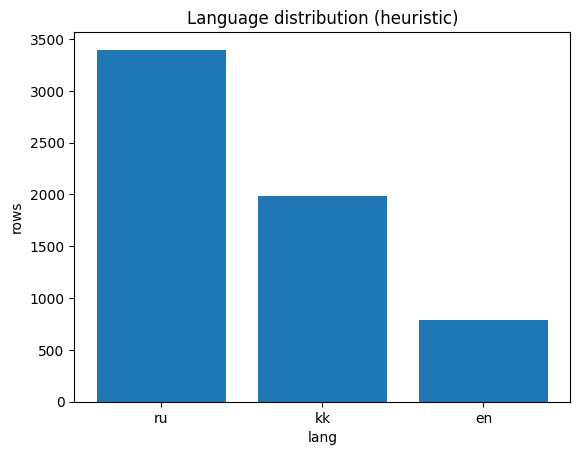

In [9]:
lang_counts = df["lang"].value_counts()

plt.figure()
plt.bar(lang_counts.index, lang_counts.values)
plt.title("Language distribution (heuristic)")
plt.xlabel("lang"); plt.ylabel("rows")
plt.show()

In [10]:
def intent_label(q: str) -> str:
    t = q.lower()

    # cost/payments
    if any(w in t for w in ["сколько", "цена", "стоимость", "оплата", "fee", "price", "cost", "payment"]):
        return "cost/payment"
    # docs
    if any(w in t for w in ["документ", "справк", "виза", "passport", "document", "visa", "id card"]):
        return "documents"
    # where / location / contact
    if any(w in t for w in ["где", "қайда", "where", "адрес", "location", "contact", "телефон", "email"]):
        return "where/contact"
    # how-to / procedure
    if any(w in t for w in ["как", "қалай", "how", "can i", "можно ли", "what should i do"]):
        return "how-to/procedure"
    # definition / what is
    if any(w in t for w in ["что такое", "define", "what is", "анықтама", "объясни"]):
        return "definition"
    return "other"

df["intent"] = df["question"].apply(intent_label)
df["intent"].value_counts()

intent
other               2574
how-to/procedure    2223
where/contact        645
definition           383
documents            183
cost/payment         165
Name: count, dtype: int64

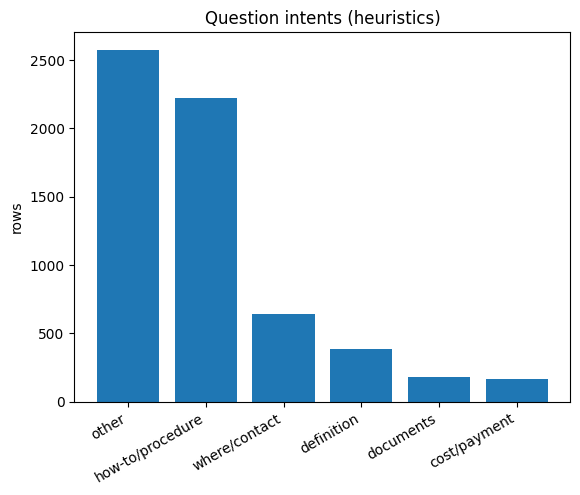

In [11]:
intent_counts = df["intent"].value_counts()

plt.figure()
plt.bar(intent_counts.index, intent_counts.values)
plt.title("Question intents (heuristics)")
plt.xticks(rotation=30, ha="right")
plt.ylabel("rows")
plt.show()

In [12]:
TOPIC_KEYWORDS = {
    "dormitory": ["общежит", "общаг", "жатақхана", "dorm", "dormitory", "hostel", "residence"],
    "admissions": ["поступ", "admission", "apply", "application", "ент", "sat", "ielts", "toefl", "documents for admission"],
    "programs/majors": ["специальност", "program", "major", "бакалавр", "магистрат", "faculty", "school", "department"],
    "tuition/fees": ["оплата", "стоимость", "fee", "tuition", "price", "cost", "payment"],
    "rules/policies": ["правил", "policy", "регламент", "discipline", "академическ", "кодекс", "plagiarism"],
    "scholarships": ["стипенд", "scholarship", "грант", "grant"],
    "ssc/office": ["ssc", "student service", "student service center", "справк", "office", "international office", "imo"],
    "gpa/transcript": ["gpa", "транскрипт", "transcript", "grade point", "оценк"],
    "university facts": ["sdu", "университет", "about", "миссия", "history", "кампус", "campus"],
}

def tag_topics(text: str):
    t = text.lower()
    tags = []
    for topic, kws in TOPIC_KEYWORDS.items():
        if any(kw in t for kw in kws):
            tags.append(topic)
    return tags

df["topics"] = (df["question"] + " " + df["answer"]).apply(tag_topics)
df["n_topics"] = df["topics"].apply(len)
df[["question","topics"]].head(5)

,question,topics
0,How to play basketball if you don't have physi...,[]
1,How to spend your time with other faculty memb...,"[programs/majors, university facts]"
2,WHEN SDUDENT SHOULD EAT LUNCH,[university facts]
3,How to use your free time in SDU,[university facts]
4,How to spent time correctly?,[]


In [13]:
from collections import Counter

cnt = Counter()
for tags in df["topics"]:
    for t in tags:
        cnt[t] += 1

topic_counts = pd.DataFrame(cnt.most_common(), columns=["topic","rows"])
topic_counts

,topic,rows
0,university facts,2857
1,admissions,2733
2,ssc/office,447
3,gpa/transcript,324
4,tuition/fees,269
5,programs/majors,246
6,scholarships,232
7,dormitory,224
8,rules/policies,224


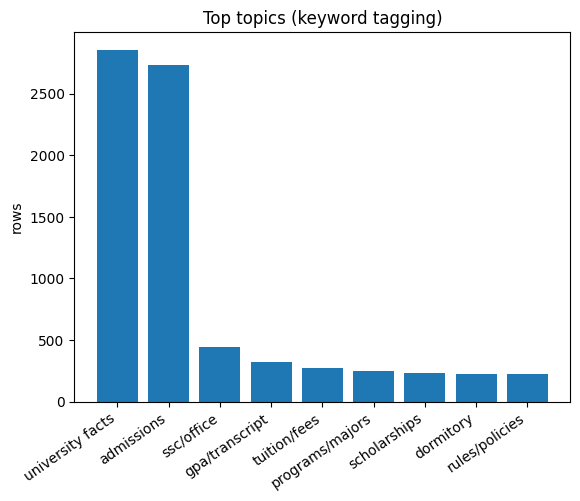

In [14]:
topN = 12
plt.figure()
plt.bar(topic_counts["topic"][:topN], topic_counts["rows"][:topN])
plt.title("Top topics (keyword tagging)")
plt.xticks(rotation=35, ha="right")
plt.ylabel("rows")
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

questions = df["question"].fillna("").tolist()

vec = CountVectorizer(ngram_range=(2,3), min_df=2)
X = vec.fit_transform(questions)
counts = np.asarray(X.sum(axis=0)).ravel()
vocab = np.array(vec.get_feature_names_out())

top_idx = counts.argsort()[::-1][:30]
top_ngrams = pd.DataFrame({"ngram": vocab[top_idx], "count": counts[top_idx]})
top_ngrams.head(20)

,ngram,count
0,что делать,314
1,что такое,311
2,делать если,278
3,что делать если,269
4,можно ли,155
5,где можно,142
6,how can,109
7,как могу,108
8,what is,99
9,деген не,86


In [22]:
df.sort_values('a_words', ascending=False)

,question,answer,question_raw,answer_raw,is_empty_q,is_empty_a,q_words,a_words,lang,intent,topics,n_topics
5952,"Что такое quiz, midterm, endterm, pre-final, f...","Quiz (квиз) - это экзамен, который проводят чт...","Что такое quiz, midterm, endterm, pre-final, f...","Quiz (квиз) - это экзамен, который проводят чт...",False,False,12,506,ru,definition,"[admissions, programs/majors, tuition/fees, ru...",6
640,What is the procedure for accessing tutoring s...,Accessing tutoring services at SDU University ...,What is the procedure for accessing tutoring s...,Accessing tutoring services at SDU University ...,False,False,11,355,en,definition,"[tuition/fees, university facts]",2
17,Which club is better to join? How do I choose ...,The university has a wide range of social club...,Which club is better to join? How do I choose ...,The university has a wide range of social club...,False,False,12,325,en,how-to/procedure,[university facts],1
4127,Что такое SDU Awards?,"Церемония награждения ""SDU Awards"" — это завер...",Что такое SDU Awards?,"Церемония награждения ""SDU Awards"" — это завер...",False,False,4,304,ru,definition,"[admissions, rules/policies, scholarships, uni...",4
636,How are presidential elections held among stud...,Presidential elections among students at SDU U...,How are presidential elections held among stud...,Presidential elections among students at SDU U...,False,False,10,282,en,how-to/procedure,"[programs/majors, ssc/office, gpa/transcript, ...",4
...,...,...,...,...,...,...,...,...,...,...,...,...
2398,.,.,.,.,False,False,1,1,en,other,[],0
1235,"Досыңызға,группаласыңызға универіңзден де сізд...","Дос,группалас,естелік,сыйлық","Досыңызға,группаласыңызға универіңзден де сізд...","Дос,группалас,естелік,сыйлық",False,False,13,1,kk,other,[],0
2384,Сабақ барысында руқсатсыз сырқа шығыуға болады?,Жоқ,Сабақ барысында руқсатсыз сырқа шығыуға болады?,Жоқ,False,False,6,1,kk,other,[],0
828,ID карта жасату үшін қанша тенге төлеу керек?,2000,ID карта жасату үшін қанша тенге төлеу керек?,2000,False,False,8,1,kk,other,[],0
